<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>


# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.
![image.png](attachment:image.png)

Apply at https://developer.twitter.com/en/apply-for-access.html
![image.png](attachment:image.png)

Then go to https://developer.twitter.com/en/review every day until you see whatever comes after this: 
![image.png](attachment:image.png)

### 2. Create Your Twitter App
![image.png](attachment:image.png)

### 3. Load Python Libraries

In [2]:
!pip install tweepy

In [3]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [4]:
my_consumer_key = ''      # your consumer key (string) goes in here
my_consumer_secret = ''   # your consumer secret key (string) goes in here
my_access_token = ''      # your access token (string goes in here
access_token_secret = ''  # your access token secret (string) goes in here

In [6]:
import json

auth_twitter_json = {
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
    , 'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
    , 'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string goes in here
    , 'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here
}

with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "my_consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "my_consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"your access token (string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"my_access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [7]:
pwd()  # make sure your working directory is where the file is

'C:\\Users\\Owner\\Desktop\\Data Science labs\\Assignments\\Module 2'

In [8]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
#pp.pprint(auth)

my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [9]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [10]:
api.followers()[0]._json

{'id': 2785691284,
 'id_str': '2785691284',
 'name': 'NIDHU CHINU JACOB',
 'screen_name': 'Nidhuchinu',
 'location': 'ITALY',
 'description': 'My youtube channel: PLEASE SUBSCRIBE\nhttps://t.co/vpIy1M5edF',
 'url': None,
 'entities': {'description': {'urls': [{'url': 'https://t.co/vpIy1M5edF',
     'expanded_url': 'https://www.youtube.com/channel/UCUSFJt3G4wOn4gg1BqeB-7Q?view_as=subscriber',
     'display_url': 'youtube.com/channel/UCUSFJ…',
     'indices': [37, 60]}]}},
 'protected': False,
 'followers_count': 7,
 'friends_count': 135,
 'listed_count': 0,
 'created_at': 'Fri Sep 26 15:21:55 +0000 2014',
 'favourites_count': 2,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 24,
 'lang': None,
 'status': {'created_at': 'Sun Sep 06 18:43:25 +0000 2020',
  'id': 1302678809993523204,
  'id_str': '1302678809993523204',
  'text': 'pedicure at home | how to do pedicure at home https://t.co/BPkyXO0gjW via @YouTube',
  'truncated': False,


Consult the Tweept and Twitter API documentation. Print a few of the response members below:

In [11]:
# Retrieve a Twitter user object
obama = api.get_user('barackobama')

In [12]:
obama.status

Status(_api=<tweepy.api.API object at 0x00000208B891D248>, _json={'created_at': 'Sat Sep 19 03:51:54 +0000 2020', 'id': 1307165496484208640, 'id_str': '1307165496484208640', 'text': 'Justice Ruth Bader Ginsburg fought to the end, through her cancer, with unwavering faith in our democracy and its i… https://t.co/BqOwCg0UG3', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/BqOwCg0UG3', 'expanded_url': 'https://twitter.com/i/web/status/1307165496484208640', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 19790, 'favorite_count': 89366, 'favorited

This will fetch recent tweets from accounts you follow:

In [13]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

@captainshanky Thanks a lot, mate 😇
@captainshanky Thanks man. Paji was soooo nice 👍
This is superb. https://t.co/dQGHDlytyB
RT @atrupar: You can’t make this stuff up
letmesee: Samsung 500GB T5 Portable SSD $99 + Delivery (Free C&amp;C) @ Bing Lee https://t.co/10YJKcN6WQ
New York taxi drivers brought traffic to a halt on the Brooklyn Bridge Thursday to demand Mayor Bill de Blasio help… https://t.co/APv0XxyvOl
jonathonsunshine: Kingston 1TB A2000 M.2 NVMe SSD, $149 @ Umart https://t.co/ZTVloS46YF
@cricketaakash Happy birthday, Aakash. Have a good one!
Thanks Partner 😇 I’ll save this tweet for future reference...especially the last line 😂🤣 https://t.co/kzxFRmTO2l
Liverpool agree £41m deal for Diogo Jota after landing Thiago Alcântara https://t.co/ED3Zk5HpLN
Happy birthday to Naimur Rahman, Bangladesh's first Test captain! 

Making a historic Test more memorable, he also… https://t.co/8sYnimZH4S
What can we expect from #IPL2020? Here's a primer 👇🏽
Boost Your Super: 90% Cashback to Your Su

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [14]:
#ANSWER:
# Your recent tweets:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

@robelinda2 Video?
I thought MU fans are most irritating and then I met Liverpool fans.
RT @nameshiv: OMG my brother in law, the gift that never stops giving, was tired of being sent to get rice every day so he decided buy in b…
https://t.co/sDnK16kCAF
Hungry? Get A$10 off your first Uber Eats order of A$20 or more. Terms apply. Use my code at checkout: eats-npwhf   https://t.co/D207pi0XJ5
https://t.co/A77PVdYmzN
Devastating. https://t.co/7AfehD8zTn
RT @BarackObama: As Michelle said, we’ve got to do everything we can to elect @JoeBiden and @KamalaHarris. So make sure you have a plan to…
RT @MichelleObama: If we want to end the chaos and division—and keep alive the possibility of progress on the issues we hold dear—we’ve got…
@cricketingview Needed to be Sort by avg_score
@ovshake42 Yeah. Journalists can start with CSK. Most influential captain of India did not know what's happening in… https://t.co/TBjlIH9i8W
What an incredible career @msdhoni had! 

ODI WC. T20 WC. Champions Trophy. 1

Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [15]:
#ANSWER:
# tweets header info
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
#     print(tweet.id_str)
    print(tweet.text)

2020-09-16 01:27:11
@robelinda2 Video?
2020-09-12 08:09:28
I thought MU fans are most irritating and then I met Liverpool fans.
2020-09-04 11:35:57
RT @nameshiv: OMG my brother in law, the gift that never stops giving, was tired of being sent to get rice every day so he decided buy in b…
2020-09-02 05:45:06
https://t.co/sDnK16kCAF
2020-08-31 08:09:18
Hungry? Get A$10 off your first Uber Eats order of A$20 or more. Terms apply. Use my code at checkout: eats-npwhf   https://t.co/D207pi0XJ5
2020-08-31 07:44:54
https://t.co/A77PVdYmzN
2020-08-29 03:52:33
Devastating. https://t.co/7AfehD8zTn
2020-08-18 03:55:14
RT @BarackObama: As Michelle said, we’ve got to do everything we can to elect @JoeBiden and @KamalaHarris. So make sure you have a plan to…
2020-08-18 03:55:08
RT @MichelleObama: If we want to end the chaos and division—and keep alive the possibility of progress on the issues we hold dear—we’ve got…
2020-08-18 03:53:07
@cricketingview Needed to be Sort by avg_score
2020-08-16 09:05:1

In [16]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(tweet_list)

In [19]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [20]:
df.head()

,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
created_at,,,,,,,,,,,,,,,,,,,,,
2020-09-16 01:27:11+00:00,1306041910411190272,1306041910411190272,@robelinda2 Video?,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.305848e+18,1305847879068561408,35399625.0,35399625,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-12 08:09:28+00:00,1304693596830838784,1304693596830838784,I thought MU fans are most irritating and then...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-04 11:35:57+00:00,1301846458316988417,1301846458316988417,"RT @nameshiv: OMG my brother in law, the gift ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,False,True,en,{'created_at': 'Thu Sep 03 14:06:04 +0000 2020...,NaN,NaN,NaN,NaN,NaN
2020-09-02 05:45:06+00:00,1301033387314933760,1301033387314933760,https://t.co/sDnK16kCAF,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,False,False,und,NaN,"{'media': [{'id': 1301033364812488706, 'id_str...",False,NaN,NaN,NaN
2020-08-31 08:09:18+00:00,1300344903562481664,1300344903562481664,Hungry? Get A$10 off your first Uber Eats orde...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,False,False,en,NaN,NaN,False,NaN,NaN,NaN


In [21]:
df.dtypes

id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
retweeted_status              object
extended_entities             object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str          object
q

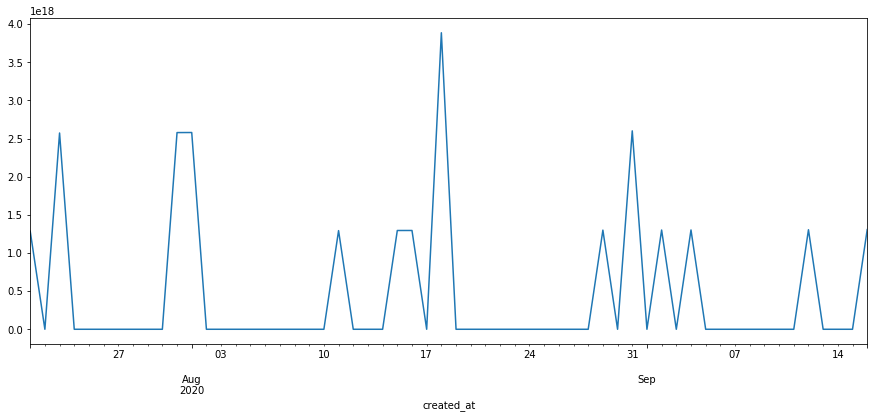

In [22]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

In [23]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [24]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [25]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show();

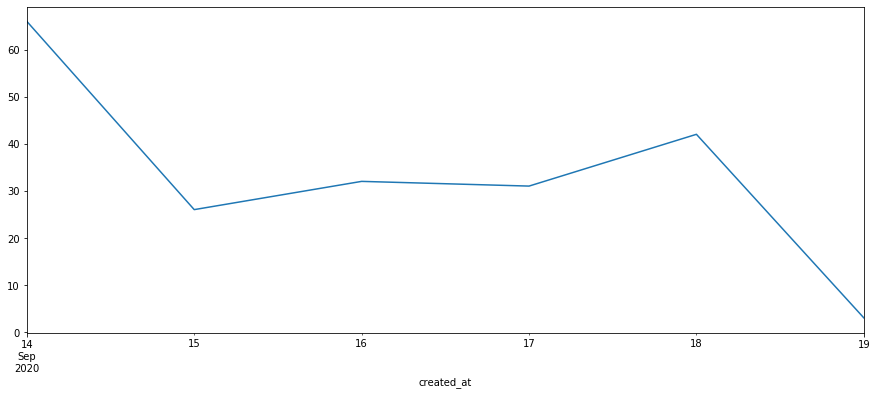

In [26]:
check_tweets('realDonaldTrump')

In [27]:
check_tweets_wordcloud('realDonaldTrump', withall=False)

NameError: name 'TextBlob' is not defined

You can create a tweet as follows:

In [ ]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [ ]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

You can follow a Tweeter:

In [28]:
# follow:
api.create_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x00000208B891D248>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Like and subscribe.', 'url': 'https://t.co/qkVaJFk2CG', 'entities': {'url': {'urls': [{'url': 'https://t.co/qkVaJFk2CG', 'expanded_url': 'https://www.youtube.com/', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 72148756, 'friends_count': 1132, 'listed_count': 78727, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 4347, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 27948, 'lang': None, 'status': {'created_at': 'Sat Sep 19 01:42:27 +0000 2020', 'id': 1307132916741406722, 'id_str': '1307132916741406722', 'text': '"Fight for the things that you care about, but do it in a way that will lead others to join you." Today we’ve lost… https://t.co/cUxxGfKrhP', 'tr

or unfollow:

In [29]:
# unfollow:
api.destroy_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x00000208B891D248>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Like and subscribe.', 'url': 'https://t.co/qkVaJFk2CG', 'entities': {'url': {'urls': [{'url': 'https://t.co/qkVaJFk2CG', 'expanded_url': 'https://www.youtube.com/', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 72148756, 'friends_count': 1132, 'listed_count': 78727, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 4347, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 27948, 'lang': None, 'status': {'created_at': 'Sat Sep 19 01:42:27 +0000 2020', 'id': 1307132916741406722, 'id_str': '1307132916741406722', 'text': '"Fight for the things that you care about, but do it in a way that will lead others to join you." Today we’ve lost… https://t.co/cUxxGfKrhP', 'tr

>
>

>
>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



